In [1]:
import matplotlib
import sys
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

from cmapPy.pandasGEXpress.parse import parse
from scipy import stats
from pandas import DataFrame as df
from matplotlib import pyplot as plt
from matplotlib.ft2font import FT2Font
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def get_font(*args, **kwargs):
    return FT2Font(*args, **kwargs)

fm.get_font = get_font

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Global Path

In [2]:
cmap_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/CMAP2020/'

In [11]:
cancer_home = '/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/CMAP2020_Cancer/'

# 0. Read CMAP2020 information

In [3]:
cell_line_info = pd.read_csv(
    cmap_home + 'cellinfo_beta.txt',
    header=0, index_col=0, sep='\t')
print(cell_line_info.shape)

(240, 19)


In [4]:
# cell_line_selected = cell_line_info[cell_line_info['primary_disease'].isin(['breast cancer', 'skin cancer'])]
cell_line_selected = cell_line_info[cell_line_info['primary_disease'].isin(['lung cancer'])]

In [4]:
cell_line_info['primary_disease'].unique()

array(['unknown', 'leukemia', 'lymphoma', 'bone cancer', 'lung cancer',
       'neuroblastoma', 'prostate cancer', 'endometrial cancer',
       'normal lung sample', 'normal blood sample',
       'normal kidney sample', 'normal stem cell sample',
       'normal soft tissue sample', 'myeloma', 'skin cancer',
       'brain cancer', 'colon cancer', 'liver cancer', 'breast cancer',
       'kidney cancer', 'bladder cancer', 'gastric cancer',
       'ovarian cancer', 'cervical cancer', 'embryonal cancer',
       'pancreatic cancer', 'head and neck cancer'], dtype=object)

In [5]:
cell_line_selected

,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,cell_type,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
cell_iname,,,,,,,,,,,,,,,,,,,
H1299,CVCL_0060,NaN,NaN,NaN,30,"ATCC-formulated RPMI-1640 Medium, ATCC 30-2001...",NaN,NaN,tumor,Unknown,Unknown,Unknown,lung,lung cancer,non small cell carcinoma,NaN,adherent,NaN,NaN
H1975,CVCL_1511,NaN,NaN,NaN,38.7,"ATCC-formulated RPMI-1640 Medium, ATCC 30-2001",NaN,NaN,tumor,Unknown,Unknown,Unknown,lung,lung cancer,carcinoma,NaN,adherent,NaN,NaN
HCC515,CVCL_5136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,F,Unknown,lung,lung cancer,carcinoma,NaN,adherent,HCC515_LUNG,HCC0515
SALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,Unknown,Unknown,lung,lung cancer,lung cancer,NaN,unknown,SALE_LUNG,NaN
A549,CVCL_0023,58,NaN,NaN,48,F-12K ATCC catalog # 3-24,CCL-185,c-4,tumor,Caucasian,M,Primary,lung,lung cancer,non small cell carcinoma,ATCC,adherent,A549_LUNG,A 549
HCC827,CVCL_2063,39,NaN,NaN,48,RPMI Invitrogen # 224-71,CRL-2868,c-12,tumor,Caucasian,F,Primary,lung,lung cancer,non small cell lung carcinoma,ATCC,adherent,HCC827_LUNG,HCC-827
NCIH1437,CVCL_1472,60,NaN,NaN,48,RPMI-164 ATCC catalog # 3-21,CRL-5872,c-14,tumor,Caucasian,M,Metastatic,lung,lung cancer,non small cell lung carcinoma,ATCC,adherent,NCIH1437_LUNG,H-1437|NCI-H1437
NCIH1563,CVCL_1475,NaN,NaN,NaN,48,RPMI-164 ATCC catalog # 3-21,CRL-5875,c-186,tumor,Unknown,M,Primary,lung,lung cancer,non small cell lung carcinoma,ATCC,adherent,NCIH1563_LUNG,H1563|H-1563|NCI-H1563
NCIH1573,CVCL_1478,35,NaN,NaN,48,RPMI-164 Invitrogen catalog # 11875-93,CRL-5877,c-179,tumor,Caucasian,F,Metastatic,lung,lung cancer,non small cell lung carcinoma,ATCC,adherent,NCIH1573_LUNG,NCI-H1573|H-1573


In [12]:
# exclude MCF10A in breast cancer, separate the BRCA and SKCM
brca_cell_line = cell_line_selected[cell_line_selected['primary_disease'] == 'breast cancer']
brca_cell_line = brca_cell_line[~brca_cell_line.index.isin(['MCF10A'])]
skcm_cell_line = cell_line_selected[cell_line_selected['primary_disease'] == 'skin cancer']
print(brca_cell_line.shape, skcm_cell_line.shape)

(9, 19) (9, 19)


In [7]:
lung_cell_line = cell_line_selected[cell_line_selected['primary_disease'] == 'lung cancer']

In [8]:
print(lung_cell_line.shape)

(28, 19)


In [7]:
# read level 5 CMAP2020 signature information
sig_info = pd.read_csv(
     cmap_home + 'siginfo_beta.txt',
     index_col='sig_id', header=0, sep='\t')

/home/dyang-server/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,3,4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# number of signatures and perturbation types in each cancer type
def sig_stat(cell_line_list, sig_info):
    '''
    Return the basic statistics of given cell line list
    '''
    tmp_sig = sig_info[sig_info['cell_mfc_name'].isin(cell_line_list)]
    print('Total number of signatures:')
    print(tmp_sig.shape[0])
    print('Total number of trt_cp:')
    print(tmp_sig[tmp_sig['pert_type'] == 'trt_cp'].shape[0])
    print('Total number of unique drugs:')
    print(len(tmp_sig[tmp_sig['pert_type'] == 'trt_cp']['pert_id'].unique()))
    print('Total number of trt_sh:')
    print(tmp_sig[tmp_sig['pert_type'] == 'trt_sh'].shape[0])
    print('Total number of unique shRNAs:')
    print(len(tmp_sig[tmp_sig['pert_type'] == 'trt_sh']['pert_id'].unique()))
    return

In [45]:
sig_stat(cell_line_list=brca_cell_line.index, sig_info=sig_info)

Total number of signatures:
136512
Total number of trt_cp:
95594
Total number of unique drugs:
13360
Total number of trt_sh:
20786
Total number of unique shRNAs:
12792


In [46]:
sig_stat(cell_line_list=skcm_cell_line.index, sig_info=sig_info)

Total number of signatures:
89593
Total number of trt_cp:
56703
Total number of unique drugs:
13574
Total number of trt_sh:
16645
Total number of unique shRNAs:
13288


In [14]:
sig_stat(cell_line_list=lung_cell_line.index, sig_info=sig_info)

Total number of signatures:
142813
Total number of trt_cp:
85436
Total number of unique drugs:
14692
Total number of trt_sh:
30053
Total number of unique shRNAs:
13644


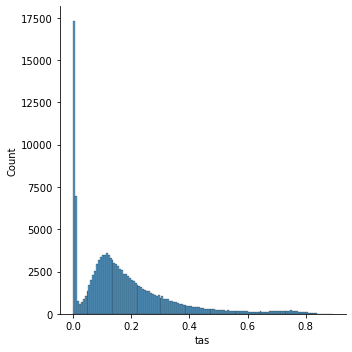

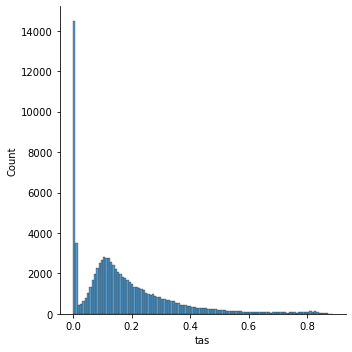

In [47]:
# take the subset and show the distribution of tas
brca_2020 = sig_info[sig_info['cell_mfc_name'].isin(brca_cell_line.index)]
skcm_2020 = sig_info[sig_info['cell_mfc_name'].isin(skcm_cell_line.index)]

sns.displot(brca_2020['tas'])
plt.show()

sns.displot(skcm_2020['tas'])
plt.show()

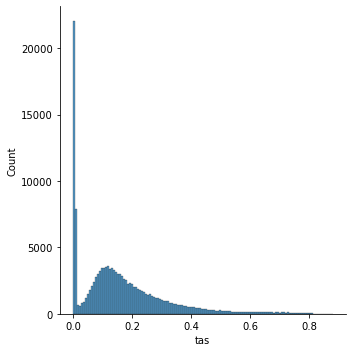

In [15]:
# take the subset and show the distribution of tas
lung_2020 = sig_info[sig_info['cell_mfc_name'].isin(lung_cell_line.index)]

sns.displot(lung_2020['tas'])
plt.show()

In [16]:
# take the high tas ones: tas > 0.4
lung_2020_tash = lung_2020[lung_2020['tas'] >= .4]

print(lung_2020_tash.shape)

(10801, 36)


In [17]:
print('Total number of signatures:')
print(lung_2020_tash.shape[0])
print('Total number of trt_cp:')
print(lung_2020_tash[lung_2020_tash['pert_type'] == 'trt_cp'].shape[0])
print('Total number of unique drugs:')
print(len(lung_2020_tash[lung_2020_tash['pert_type'] == 'trt_cp']['pert_id'].unique()))
print('Total number of trt_sh:')
print(lung_2020_tash[lung_2020_tash['pert_type'] == 'trt_sh'].shape[0])
print('Total number of shRNAs:')
print(len(lung_2020_tash[lung_2020_tash['pert_type'] == 'trt_sh']['pert_id'].unique()))

Total number of signatures:
10801
Total number of trt_cp:
6901
Total number of unique drugs:
1597
Total number of trt_sh:
2828
Total number of shRNAs:
2434


In [48]:
# take the high tas ones: tas > 0.4
brca_2020_tash = brca_2020[brca_2020['tas'] >= .4]
skcm_2020_tash = skcm_2020[skcm_2020['tas'] >= .4]

print(brca_2020_tash.shape, skcm_2020_tash.shape)

(12119, 36) (8032, 36)


In [49]:
print('Total number of signatures:')
print(brca_2020_tash.shape[0])
print('Total number of trt_cp:')
print(brca_2020_tash[brca_2020_tash['pert_type'] == 'trt_cp'].shape[0])
print('Total number of unique drugs:')
print(len(brca_2020_tash[brca_2020_tash['pert_type'] == 'trt_cp']['pert_id'].unique()))
print('Total number of trt_sh:')
print(brca_2020_tash[brca_2020_tash['pert_type'] == 'trt_sh'].shape[0])
print('Total number of shRNAs:')
print(len(brca_2020_tash[brca_2020_tash['pert_type'] == 'trt_sh']['pert_id'].unique()))

Total number of signatures:
12119
Total number of trt_cp:
9573
Total number of unique drugs:
1829
Total number of trt_sh:
2060
Total number of shRNAs:
1787


In [50]:
print('Total number of signatures:')
print(skcm_2020_tash.shape[0])
print('Total number of trt_cp:')
print(skcm_2020_tash[skcm_2020_tash['pert_type'] == 'trt_cp'].shape[0])
print('Total number of unique drugs:')
print(len(skcm_2020_tash[skcm_2020_tash['pert_type'] == 'trt_cp']['pert_id'].unique()))
print('Total number of trt_sh:')
print(skcm_2020_tash[skcm_2020_tash['pert_type'] == 'trt_sh'].shape[0])
print('Total number of unique shRNAs:')
print(len(skcm_2020_tash[skcm_2020_tash['pert_type'] == 'trt_sh']['pert_id'].unique()))

Total number of signatures:
8032
Total number of trt_cp:
4917
Total number of unique drugs:
1442
Total number of trt_sh:
2384
Total number of unique shRNAs:
2161


In [51]:
brca_2020_tash

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
sig_id,,,,,,,,,,,,,,,,,,,,,
HOG001_MCF7_24H:BRD-A13122391-001-01-9:0.1234,b10,0.125,0.1234,uM,0.125 uM,24 h,24.0,h,MCF7,BRD-A13122391,...,MCF7,K07,HOG001_MCF7_24H_X1_B10|HOG001_MCF7_24H_X2_B10|...,HOG001_MCF7_24H_X1_B10:K07|HOG001_MCF7_24H_X2_...,NaN,HOG,triptolide,0,1.0,0.0
HDAC002_MCF7_24H:BRD-K52313696-001-01-6:1.25,b7,1.250,1.2500,uM,1.25 uM,24 h,24.0,h,MCF7,BRD-K52313696,...,MCF7,E03|L03,HDAC002_MCF7_24H_X1_B7_DUO52HI53LO|HDAC002_MCF...,HDAC002_MCF7_24H_X1_B7_DUO52HI53LO:E03|HDAC002...,NaN,HDAC,tacedinaline,0,1.0,0.0
CPD002_MCF7_24H:BRD-K26104851-001-15-3:10,b6,10.000,10.0000,uM,10 uM,24 h,24.0,h,MCF7,BRD-K26104851,...,MCF7,O12,CPD002_MCF7_24H_X1_B6_DUO52HI53LO|CPD002_MCF7_...,CPD002_MCF7_24H_X1_B6_DUO52HI53LO:O12|CPD002_M...,NaN,CPD,nifuroxazide,1,1.0,0.0
HDAC001_MCF7_6H:BRD-A19037878:10,f1b3,10.000,10.0000,uM,10 uM,6 h,6.0,h,MCF7,BRD-A19037878,...,MCF7,B03,HDAC001_MCF7_6H_X1_F1B3_DUO52HI53LO|HDAC001_MC...,HDAC001_MCF7_6H_X1_F1B3_DUO52HI53LO:B03|HDAC00...,NaN,HDAC,BRD-A19037878,0,1.0,0.0
MET001_MCF7_XH:BRD-A19037878:10:24,b17,10.000,10.0000,uM,10 uM,24 h,24.0,h,MCF7,BRD-A19037878,...,MCF7,P06|P07|P08|P09,MET001_MCF7_XH_X1_B17,MET001_MCF7_XH_X1_B17:P06|MET001_MCF7_XH_X1_B1...,NaN,MET,BRD-A19037878,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DOSVAL004_MCF7_24H:BRD-K88378636:20,b19,20.000,20.0000,uM,20 uM,24 h,24.0,h,MCF7,BRD-K88378636,...,MCF7,O04,DOSVAL004_MCF7_24H_X1_B19|DOSVAL004_MCF7_24H_X...,DOSVAL004_MCF7_24H_X1_B19:O04|DOSVAL004_MCF7_2...,NaN,DOSVAL,withaferin-a,0,1.0,0.0
DOSVAL005_MCF7_24H:BRD-A79768653:5,b19,4.000,5.0000,uM,4 uM,24 h,24.0,h,MCF7,BRD-A79768653,...,MCF7,C21,DOSVAL005_MCF7_24H_X1_B19|DOSVAL005_MCF7_24H_X...,DOSVAL005_MCF7_24H_X1_B19:C21|DOSVAL005_MCF7_2...,NaN,DOSVAL,sirolimus,0,1.0,0.0
DOSVAL005_MCF7_24H:BRD-K47551852:20,b19,20.000,20.0000,uM,20 uM,24 h,24.0,h,MCF7,BRD-K47551852,...,MCF7,L10,DOSVAL005_MCF7_24H_X1_B19|DOSVAL005_MCF7_24H_X...,DOSVAL005_MCF7_24H_X1_B19:L10|DOSVAL005_MCF7_2...,NaN,DOSVAL,BRD-K47551852,0,1.0,0.0


In [136]:
brca_2020_tash.to_csv('CMAP2020_Cancer/BRCA/brca_2020_tash_sig_info.csv', sep=',')
skcm_2020_tash.to_csv('CMAP2020_Cancer/SKCM/skcm_2020_tash_sig_info.csv', sep=',')

In [20]:
lung_2020_tash.to_csv('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/CMAP2020_Cancer/LUNG/lung_2020_tash_sig_info.csv', sep=',')

In [85]:
if 'EZH2' in list(brca_2020[brca_2020['pert_type'] == 'trt_sh']['cmap_name']):
    print('Yes')
if 'EZH2' in list(brca_2020_tash[brca_2020_tash['pert_type'] == 'trt_sh']['cmap_name']):
    print('Yes')

Yes
Yes


In [87]:
if 'EZH2' in list(skcm_2020[skcm_2020['pert_type'] == 'trt_sh']['cmap_name']):
    print('Yes')
if 'EZH2' in list(skcm_2020_tash[skcm_2020_tash['pert_type'] == 'trt_sh']['cmap_name']):
    print('Yes')

Yes
Yes


In [88]:
# read L1000 id
landmark = pd.read_csv(
    '/home/dyang-server/hdd/Yue/COMP_YUE/COMP/CLUE/gene_landmarks_L1000.csv',
    sep=',', index_col='Official NCBI gene id', header=0)

# read L1000 inferred genes
landmark_infer = pd.read_csv(
    '/home/dyang-server/hdd/Yue/COMP_YUE/COMP/CLUE/gene_inference_category_L1000.csv',
    sep='\t', index_col=0, header=0)

landmark_infer_best = landmark_infer[landmark_infer['Inference Category'] == 'Best Inferred (BING)']
landmark_infer_poor = landmark_infer[landmark_infer['Inference Category'] == 'Inferred']
landmark_infer_best.shape

(9196, 6)

# 1. Prepare the perturbation signature

In [13]:
def prepare_signature(cancer_type, sig_subset):
    '''
    Parse the CMAP2020 matrix for the input cancer type and signature subsets.
    '''
    if cancer_type not in os.listdir('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/CMAP2020_Cancer/'):
        os.mkdir('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/CMAP2020_Cancer/' + cancer_type)
    
    # parse the trt_cp
    trt_cp = parse(
        '/home/dyang-server/hdd/Yue/PROJECTS/COMP/CLUE/2020/level5_beta_trt_cp_n720216x12328.gctx',
        cid=sig_subset[sig_subset['pert_type'] == 'trt_cp'].index).data_df
    
    # parse the trt_sh
    trt_sh = parse(
        '/home/dyang-server/hdd/Yue/PROJECTS/COMP/CLUE/2020/level5_beta_trt_sh_n238351x12328.gctx',
        cid=sig_subset[sig_subset['pert_type'] == 'trt_sh'].index).data_df
    
    trt_cp.to_csv('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/CMAP2020_Cancer/' + cancer_type + '/CMAP2020_lv5_trt_cp_merged.csv', sep=',')
    trt_sh.to_csv('/home/dyang-server/hdd/Yue/PROJECTS/POSEIDON/data/CMAP2020_Cancer/' + cancer_type + '/CMAP2020_lv5_trt_sh_merged.csv', sep=',')
    
    return trt_cp, trt_sh

In [53]:
brca_trt_cp, brca_trt_sh = prepare_signature(cancer_type='BRCA', sig_subset=brca_2020_tash)
skcm_trt_cp, skcm_trt_sh = prepare_signature(cancer_type='SKCM', sig_subset=skcm_2020_tash)

In [24]:
lung_trt_cp, lung_trt_sh = prepare_signature(cancer_type='LUNG', sig_subset=lung_2020_tash)

In [91]:
brca_trt_cp.index = brca_trt_cp.index.astype(int)
brca_trt_cp_renamed = brca_trt_cp.rename(index=landmark['Official NCBI gene symbol'])
brca_trt_cp_renamed = brca_trt_cp_renamed.rename(index=landmark_infer_best['Gene Symbol'])
brca_trt_cp_renamed = brca_trt_cp_renamed[~brca_trt_cp_renamed.index.isin(landmark_infer_poor.index)]

In [93]:
brca_trt_sh.index = brca_trt_sh.index.astype(int)
brca_trt_sh_renamed = brca_trt_sh.rename(index=landmark['Official NCBI gene symbol'])
brca_trt_sh_renamed = brca_trt_sh_renamed.rename(index=landmark_infer_best['Gene Symbol'])
brca_trt_sh_renamed = brca_trt_sh_renamed[~brca_trt_sh_renamed.index.isin(landmark_infer_poor.index)]

In [94]:
skcm_trt_cp.index = skcm_trt_cp.index.astype(int)
skcm_trt_cp_renamed = skcm_trt_cp.rename(index=landmark['Official NCBI gene symbol'])
skcm_trt_cp_renamed = skcm_trt_cp_renamed.rename(index=landmark_infer_best['Gene Symbol'])
skcm_trt_cp_renamed = skcm_trt_cp_renamed[~skcm_trt_cp_renamed.index.isin(landmark_infer_poor.index)]

In [95]:
skcm_trt_sh.index = skcm_trt_sh.index.astype(int)
skcm_trt_sh_renamed = skcm_trt_sh.rename(index=landmark['Official NCBI gene symbol'])
skcm_trt_sh_renamed = skcm_trt_sh_renamed.rename(index=landmark_infer_best['Gene Symbol'])
skcm_trt_sh_renamed = skcm_trt_sh_renamed[~skcm_trt_sh_renamed.index.isin(landmark_infer_poor.index)]

In [70]:
# show the cutoff distribution
def cutoff_dist(sig_matrix):
    for c in range(1, 5):
        tmp_sig = sig_matrix[abs(sig_matrix) >= c].fillna(0)
        tmp_sig = np.sign(tmp_sig) * 1
        tmp_sig = tmp_sig[tmp_sig == 0].fillna(1)
        tmp_sig_counts = tmp_sig.sum(axis=0)
        sns.kdeplot(tmp_sig_counts, label=c)
    
    plt.legend()
    return

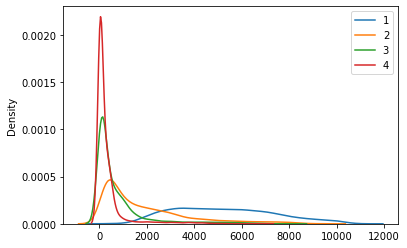

In [71]:
cutoff_dist(brca_trt_cp)

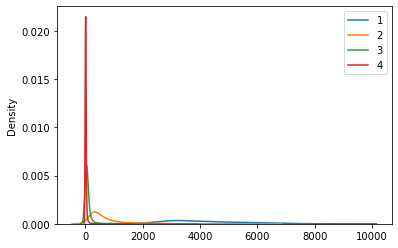

In [72]:
cutoff_dist(brca_trt_sh)

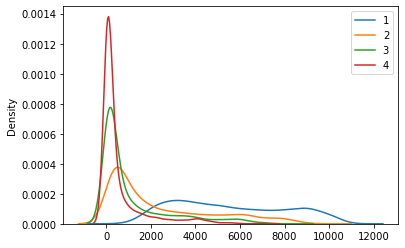

In [73]:
cutoff_dist(skcm_trt_cp)

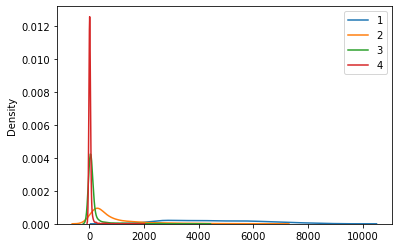

In [74]:
cutoff_dist(skcm_trt_sh)

In [133]:
# establish the signatures
def cutoff_select(cutoff, sig_matrix, pert_type, cancer_type):
    cut_matrix = sig_matrix[abs(sig_matrix) >= 1.].fillna(0)
    cut_matrix_sig = np.sign(cut_matrix) * 1
    
    # remove all zeros
    cut_matrix_sig_final = cut_matrix_sig[cut_matrix_sig != 0].dropna(axis=0, how='all').fillna(0)
    
    # write output
    cut_matrix_sig_final.to_csv('CMAP2020_Cancer/' + cancer_type + '/' + pert_type + '_sigcut_' + str(cutoff) + '.csv', sep='\t')
    
    return

In [134]:
cutoff_select(cutoff=1, sig_matrix=brca_trt_cp_renamed, pert_type='trt_cp', cancer_type='BRCA')
cutoff_select(cutoff=1, sig_matrix=brca_trt_sh_renamed, pert_type='trt_sh', cancer_type='BRCA')
cutoff_select(cutoff=1, sig_matrix=skcm_trt_cp_renamed, pert_type='trt_cp', cancer_type='SKCM')
cutoff_select(cutoff=1, sig_matrix=skcm_trt_sh_renamed, pert_type='trt_sh', cancer_type='SKCM')

In [135]:
cutoff_select(cutoff=2, sig_matrix=brca_trt_cp_renamed, pert_type='trt_cp', cancer_type='BRCA')
cutoff_select(cutoff=2, sig_matrix=brca_trt_sh_renamed, pert_type='trt_sh', cancer_type='BRCA')
cutoff_select(cutoff=2, sig_matrix=skcm_trt_cp_renamed, pert_type='trt_cp', cancer_type='SKCM')
cutoff_select(cutoff=2, sig_matrix=skcm_trt_sh_renamed, pert_type='trt_sh', cancer_type='SKCM')

In [100]:
skcm_trt_sh_renamed.loc['TAP1'].max()

3.3941500186920166

In [101]:
skcm_2020_tash[skcm_2020_tash['cmap_name'] == 'EZH2']

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
sig_id,,,,,,,,,,,,,,,,,,,,,
KDB006_A375_96H:TRCN0000040075:-666,b4,NaN,NaN,NaN,NaN,96 h,96.0,h,A375,TRCN0000040075,...,A375,J21,KDB006_A375_96H_X1_B4_DUO52HI53LO|KDB006_A375_...,KDB006_A375_96H_X1_B4_DUO52HI53LO:J21|KDB006_A...,NaN,KDB,EZH2,0,1.0,0.0
KDB006_A375_96H:TRCN0000010474:-666,b4,NaN,NaN,NaN,NaN,96 h,96.0,h,A375,TRCN0000010474,...,A375,D13,KDB006_A375_96H_X1_B4_DUO52HI53LO|KDB006_A375_...,KDB006_A375_96H_X1_B4_DUO52HI53LO:D13|KDB006_A...,NaN,KDB,EZH2,0,1.0,0.0


In [132]:
print(skcm_trt_sh_renamed.loc['KIF23', skcm_2020_tash[skcm_2020_tash['cmap_name'] == 'EZH2'].index])
print(brca_trt_sh_renamed.loc['KIF23', brca_2020_tash[brca_2020_tash['cmap_name'] == 'EZH2'].index])

sig_id
KDB006_A375_96H:TRCN0000040075:-666   -2.069502
KDB006_A375_96H:TRCN0000010474:-666   -1.423163
Name: KIF23, dtype: float32
sig_id
KDB006_MCF7_144H:TRCN0000040075:-666    0.076150
KDD009_MCF7_96H:TRCN0000040076:-666    -0.645713
KDD009_MCF7_96H:TRCN0000010474:-666    -0.368039
KDD009_MCF7_96H:TRCN0000040075:-666    -0.714326
KDD009_MCF7_96H:TRCN0000040077:-666    -1.148567
Name: KIF23, dtype: float32


# Expand to other cancer types

In [6]:
cell_cancer_selected = {'PRAD': 'prostate cancer',
                        'UCEC': 'endometrial cancer', #
                        'BRAIN': 'brain cancer', #
                        'CRC': 'colon cancer',
                        'LIHC': 'liver cancer',
                        'KIDNEY': 'kidney cancer', #
                        'BLCA': 'bladder cancer', #
                        'STAD': 'gastric cancer', #
                        'OV': 'ovarian cancer', #
                        'CESC': 'cervical cancer', #
                        'PAAD': 'pancreatic cancer', #
                        'HNSC': 'head and neck cancer'} #

In [10]:
for ct in cell_cancer_selected.keys():
    tmp_cell_line = cell_line_info[cell_line_info['primary_disease'] == cell_cancer_selected[ct]]
    print(ct)
    sig_stat(cell_line_list=tmp_cell_line.index, sig_info=sig_info)
    print('\n')

PRAD
Total number of signatures:
172989
Total number of trt_cp:
93595
Total number of unique drugs:
20682
Total number of trt_sh:
48558
Total number of unique shRNAs:
18481


UCEC
Total number of signatures:
10587
Total number of trt_cp:
10377
Total number of unique drugs:
1024
Total number of trt_sh:
0
Total number of unique shRNAs:
0


BRAIN
Total number of signatures:
2887
Total number of trt_cp:
2827
Total number of unique drugs:
726
Total number of trt_sh:
0
Total number of unique shRNAs:
0


CRC
Total number of signatures:
81636
Total number of trt_cp:
50359
Total number of unique drugs:
12846
Total number of trt_sh:
18491
Total number of unique shRNAs:
13585


LIHC
Total number of signatures:
45058
Total number of trt_cp:
21878
Total number of unique drugs:
6251
Total number of trt_sh:
12868
Total number of unique shRNAs:
11858


KIDNEY
Total number of signatures:
729
Total number of trt_cp:
703
Total number of unique drugs:
120
Total number of trt_sh:
0
Total number of unique s

In [16]:
for ct in cell_cancer_selected.keys():
    tmp_cell_line = cell_line_info[cell_line_info['primary_disease'] == cell_cancer_selected[ct]]
    tmp_sig = sig_info[sig_info['cell_mfc_name'].isin(tmp_cell_line.index)]
    
    # take tas > 0.4
    tmp_sig_tash = tmp_sig[tmp_sig['tas'] >= .4]
    
    print(ct)
    sig_stat(cell_line_list=tmp_cell_line.index, sig_info=tmp_sig_tash)
    print('\n')

PRAD
Total number of signatures:
12737
Total number of trt_cp:
8107
Total number of unique drugs:
2572
Total number of trt_sh:
3923
Total number of unique shRNAs:
2886


UCEC
Total number of signatures:
38
Total number of trt_cp:
38
Total number of unique drugs:
26
Total number of trt_sh:
0
Total number of unique shRNAs:
0


BRAIN
Total number of signatures:
2
Total number of trt_cp:
2
Total number of unique drugs:
2
Total number of trt_sh:
0
Total number of unique shRNAs:
0


CRC
Total number of signatures:
6031
Total number of trt_cp:
4516
Total number of unique drugs:
1259
Total number of trt_sh:
1317
Total number of unique shRNAs:
1100


LIHC
Total number of signatures:
4150
Total number of trt_cp:
2361
Total number of unique drugs:
866
Total number of trt_sh:
1437
Total number of unique shRNAs:
1381


KIDNEY
Total number of signatures:
0
Total number of trt_cp:
0
Total number of unique drugs:
0
Total number of trt_sh:
0
Total number of unique shRNAs:
0


BLCA
Total number of signa

In [15]:
for ct in cell_cancer_selected.keys():
    tmp_cell_line = cell_line_info[cell_line_info['primary_disease'] == cell_cancer_selected[ct]]
    tmp_sig = sig_info[sig_info['cell_mfc_name'].isin(tmp_cell_line.index)]
    
    # take tas > 0.4
    tmp_sig_tash = tmp_sig[tmp_sig['tas'] >= .4]
    
    if ct not in os.listdir(cancer_home):
        os.mkdir(cancer_home + ct)
    tmp_sig_tash.to_csv(cancer_home + ct + '/' + '_'.join(cell_cancer_selected[ct].split(' ')) + '_2020_tash_sig_info.csv', sep=',')

In [14]:
for ct in cell_cancer_selected.keys():
    tmp_cell_line = cell_line_info[cell_line_info['primary_disease'] == cell_cancer_selected[ct]]
    tmp_sig = sig_info[sig_info['cell_mfc_name'].isin(tmp_cell_line.index)]
    
    # take tas > 0.4
    tmp_sig_tash = tmp_sig[tmp_sig['tas'] >= .4]
    
    # generate subset
    prepare_signature(cancer_type=ct, sig_subset=tmp_sig_tash)